# Decision Tree Classifiers

> If there are two courses of action, you should take the third.

<footer>Jewish Proverb</footer>

![break](assets/agenda.png)

1. [Decision Trees](#Decision-Trees)
1. [Building Decision Trees](#Building-Decision-Trees)
1. [Preventing Overfitting](#Preventing-Overfitting)

**Labs**
1. [Implementing Decision Trees With Scikit-learn](#Implementing-Decision-Trees-With-Scikit-learn)

![break](assets/mountain.png)

## Classwork Review

### Class Imbalance

Class Imbalance is the problem that the total number of a class of data (positive) is far less than the total number of another class of data (negative). This can be a problem because when you train a model, it may become really good at finding the majority class, but far weaker at capturing the minority class - while the minority case is often what's most interesting.

![](assets/dataset-partition.png)

The approached for addressing this are:
* **Sampling based** : By **oversampling** the minority class, it has more effect on the machine learning algorithm, or by **undersampling** majority class so it has less effect on the machine learning algorithm.
* **Cost function based approaches** : Make it more 'costly' for the learning algorithm to make mistakes in the minority class. This is done by tweaking the **cost function**.

![break](assets/theory.png)

## Decision Trees

![tree](assets/tree.jpg)

A decision tree is a flowchart-like structure in which each internal node represents a test of an attribute, each branch represents an outcome of that test and each leaf node represents class label (a decision taken after testing all attributes in the path from the root to the leaf). Each path from the root to a leaf can also be represented as a classification rule.

### Characteristics

* **Non-parametric**: no parameters, no distribution assumptions
* **Hierarchical**: consists of a sequence of questions which yield a class label when applied to any record
* **Variable Size**: Any boolean functions can be represented
* **Deterministic**: For the same set of features the tree will assign the same label
* Support for **Discrete** and **Continuous** Parameters:
  * Binning and Threshold

### Node

In a decision tree, the nodes represent questions (test conditions) and the edges are the answers to these questions.

* *Edge*, lead from one a _parent_ to _child_ nodes
* *Root*, node has 0 incoming edges, and 2+ outgoing edges.
* *Leaf*, has 1 incoming edge and, 0 outgoing edges. Leaf nodes
correspond to class labels.


### Representation

![Hypertriangles](assets/hypertriangles.jpg)

![](assets/vertedrate_dataset.png)

![](assets/decision_tree_mammal.png)

Internal nodes represent test conditions which partition the records at that node.

![](assets/decision_boundaries.jpg)

## Building Decision Trees

To build a decision tree, one possibility would be to evaluate all possible decision trees (eg, all permutations of test conditions) for a given dataset. But this is generally too complex to be practical à $ \rightarrow O(2^n)$.

We can find a practical solution that works, by using a **heuristic** algorithm.


The basic method used to build (or “grow”) a decision tree is **Hunt’s
algorithm**.

Hunt’s is a greedy recursive algorithm that leads to a local optimum. It builds a decision tree by recursively partitioning records into smaller & smaller subsets.


* greedy – algorithm makes locally optimal decision at each step
* recursive – splits task into subtasks, solves each the same way
* local optimum – solution for a given neighborhood of points


The partitioning decision is made at each node according to a metric called purity. A partition is 100% pure when all of its records belong to a single class. Let $D_t$ be the set of training records that reach a node $t$. The general recursive procedure is defined as below:

* If $D_t$ only contains records that belong the same class $y_t$, then $t$ is a leaf node labeled as $y_t$
* If $D_t$ is an empty set, then $t$ is a leaf node labeled by the default class, $y_d$
* If $D_t$ contains records that belong to more than one class, use an attribute test to split the data into smaller subsets.

It recursively applies the procedure to each subset until all the records in the subset belong to the same class. The Hunt's algirithm assumes that each combination of attribute sets has a unique class label during the procedure. If all the records associated with $D_t$ have identical attribute values except for the class label, then it is not possible to split these records any further. In this case, the node is declared a leaf node with the same class label as the majority class of training records associated with this node.

### Partitions

* *Binary attributes* : leads to two-way split test condition.

![](assets/dt_binary.png)

* *Nominal attributes* : the test condition can be expressed into multiway split on each distinct values, or two-way split by grouping the attribute values into two subsets.

![](assets/dt_nominal.png)

* *Ordinal attributes* : can also produce binary or multiway splits as long as the grouping does not violate the order property of the attribute values.

![](assets/dt_ordinal.png)

* *Continuous attributes* : The test condition can be expressed as a comparsion test with two outcomes, or a range query. Or we can discretize the continous value into nominal attribute and then perform two-way or multi-way split.

![](assets/dt_continuous.png)

### Purity

The hardest part about building the tree is selecting the best attribute test condition, in other words, the best split. There are three common impurity measures used to measure the best split. Since the goal of a decision tree is to have nodes consisting entirely of members of a single class, the impurity of a node is the extent to which that is not the case. For example, a node with 2 members of one class, and 0 members of another class has zero impurity. A node with 1 member of one class, and one of another, however, has the highest impurity. The three most common measures of impurity are entropy, gini impurity, and classification error. They are defined using the following equations, where $p(i|t)$ denotes the fraction of records that belong to class $i$ at a given node $t$, and $c$ is the number of classes:

In [30]:
from __future__ import division
import numpy as np
node_a = (12,8)
node_b = (2,18)
purity = lambda x : np.max(x) / np.sum(x)

$$Entropy(t)=-\sum\limits_{i=0}^{c}p(i|t)\log_{2} p(i|t)$$

In [33]:
print "purity @ node_a :", purity(node_a)
print "purity @ node_b :", purity(node_b)
entropy_a = -1 * (purity(node_a) * np.log2(purity(node_a)))
entropy_a = -1 * np.sum([node * np.log2(node) for node in [purity(node_a), 1 - purity(node_a)]])
entropy_b = -1 * np.sum([node * np.log2(node) for node in [purity(node_b), 1 - purity(node_b)]])

print "entroy of split :", entropy_a
print "entroy of split :", entropy_b

purity @ node_a : 0.6
purity @ node_b : 0.9
entroy of split : 0.970950594455
entroy of split : 0.468995593589


$$Gini(t)=1-\sum\limits_{i=0}^{c} [p(i|t)]^2$$

In [34]:
print "purity @ node_a :", purity(node_a)
print "purity @ node_b :", purity(node_b)
gini_a = 1 - np.sum([np.square(node) for node in [purity(node_a), 1 - purity(node_a)]])
gini_b = 1 - np.sum([np.square(node) for node in [purity(node_b), 1 - purity(node_b)]])

print "gini of node_a :", gini_a
print "gini of node_b :", gini_b

purity @ node_a : 0.6
purity @ node_b : 0.9
gini of node_a : 0.48
gini of node_b : 0.18


$$ Classification\ error(t)=1-\max_{i}[p(i|t)] $$

In [13]:
print "purity @ node_a :", purity(node_a)
print "purity @ node_b :", purity(node_b)
class_error_a = 1 - purity(node_a)
class_error_b = 1 - purity(node_b)

print "classification error of node_a :", class_error_a
print "classification error of node_b :", class_error_b

purity @ node_a : 0.6
purity @ node_b : 0.9
classification error of node_a : 0.4
classification error of node_b : 0.1


![](assets/impurity_measures.png)

The equation for information gain is:

$$ \Delta = I(parent) - \sum\limits_{j=1}^k \frac{N(v_j)}{N}I(v_j) $$

Where $I(⋅)$ is the impurity measure of a given node, $N$ is the total number or records at the given node's parent, $k$ is the number of attribute values, and $N(v_j)$ is the number of records associated with the child node, $v_j$.

In [35]:
def purity(split):
    return np.max(split)/np.sum(split)

In [36]:
def gini(split):
    a = purity(split)
    b = 1 - a
    gini = 1 - np.sum(np.square(a) + np.square(b))
    return gini

In [37]:
def parent_node(nodes):
    return [np.sum(x) for x in zip(nodes)]

In [38]:
def info_gain(nodes):
    return gini(parent_node(nodes)) - sum([(np.sum(node)/np.sum(parent_node(nodes))) * gini(node) for node in nodes])

In [41]:
nodes = [node_a,node_b]

def info_gain(nodes):
    a = nodes[0]
    b = nodes[1]
    gini_parent = gini(parent_node(nodes))
    child_node_a = (np.sum(a) / np.sum(parent_node(nodes))) * gini(a)
    child_node_b = (np.sum(b) / np.sum(parent_node(nodes))) * gini(b)
    return gini_parent - np.sum([child_node_a,child_node_b])

In [42]:
ig = info_gain([node_a,node_b])
print "Information Gain: %.03f" % ig

Information Gain: 0.170


#### Splitting Binary Attributes

![](assets/dt_splitting_binary.png)

In [44]:
(gini((1,4)) * 5 + gini((5,2)) * 7) / 12

0.37142857142857139

In [48]:
0.5 - info_gain([[4,3],[2,3]])

0.49960317460317466

#### Splitting Nominal Attributes

![](assets/dt_splitting_nominal.png)

#### Splitting Continous Attributes

![](assets/dt_splitting_continuous.png)

### Gain Ratio

Generally speaking, a test condition with a high number of outcomes
can lead to overfitting (ex: a split with one outcome per record).
One way of dealing with this is to restrict the algorithm to binary
splits only (CART). Another way is to use a splitting criterion which explicitly penalizes the number of outcomes (C4.5). We can use a function of the information gain called the gain ratio to explicitly penalize high numbers of outcomes.

Gain ratio is a modification of the information gain that reduces its bias on high-branch attributes. It will be

* Large when data is evenly spread
* Small when all data belong to one branch

But the Gain Ratio also takes the number and size of branches into account when choosing an attribute. It corrects the information gain by taking the _intrinsic information_ of a split into account. That is, how much info do we need to tell which branch an instance belongs to.

$$ Gain ratio = \frac{\Delta info}{Split Info} $$

$$ Split Info = -\sum\limits_{i=0}^{k}P(v_i)log_2 P(v_i) $$

Where $p(v_i)$ refers to the probability of label $i$ at node $v$ and $k$ is the total number of splits. For example, if each attribute value has the same number of records, then $∀_i : P(v_i) = 1/k $ and the split information would be equal to $log_{2}k$. This example suggests that if an attribute produces a large number of splits, its split information will also be large , which in turn reduces its gain ratio.

## Preventing Overfitting

In addition to determining splits, we also need a stopping criterion to
tell us when we’re done. For example, we can stop when all records belong to the same class,
or when all records have the same attributes. This is correct in principle, but would likely lead to overfitting.

### pre-pruning

One possibility is pre-pruning, which involves setting a minimum
threshold on the gain, and stopping when no split achieves a gain
above this threshold.

This prevents overfitting, but is difficult to calibrate in practice (may
preserve bias!)

### post-pruning

Alternatively we could build the full tree, and then perform pruning
as a post-processing step.

To prune a tree, we examine the nodes from the bottom-up and
simplify pieces of the tree (according to some criteria).

Complicated subtrees can be replaced either with a single node, or
with a simpler (child) subtree.

The first approach is called **subtree replacement**, and the second is
**subtree raising**.

![](assets/dt_post_pruning.png)

Generally, (or at least depending on your data), it can be very easy to overfit a model with decision trees.

![](assets/dt_overfitting.png)

## Dealing with missing values

* Imputing during training
  * Most frequent one in the dataset
  * Most frequent in its class
  * Fractional Examples, proportional to the real distribution


* Imputing during testing
  * Voting by fractional leafs

### Tree algorithms: ID3, C4.5 and CART

What are all the various decision tree algorithms and how do they differ from each other? Scikit-learn uses an optimised version of the CART algorithm.

* ID3 (Iterative Dichotomiser 3) algorithm builds tree based on the information (information gain) obtained from the training instances and then uses the same to classify the test data. ID3 algorithm generally uses nominal attributes for classification with no missing values. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

* C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

* CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

![break](assets/code.png)

## Implementing Decision Trees With Scikit-learn

* Implement the decision tree classification to the test iris set
* Review the implementation and output of a confusion matrix
* Error terms: Precision and Recall

### Decision Tree Implementation

Iris implementation (as per usual):

In [50]:
from sklearn import datasets, metrics, tree, cross_validation
from matplotlib import pyplot as plt

iris = datasets.load_iris()

clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(iris.data, iris.target).predict(iris.data)

print "Number of mislabeled points : %d" % (iris.target != y_pred).sum()
print "Absolutely ridiculously overfit score: %d" % (tree.DecisionTreeClassifier().fit(iris.data,
    iris.target).score(iris.data, iris.target))

Number of mislabeled points : 0
Absolutely ridiculously overfit score: 1


BEFORE we discuss the over-the-top overfitting with this model, get acquainted
with two more important views of error to understand the performance of the model.

### Confusion Matrices

Confusion matrices allow you to view actual vs. predicted for all class labels.
Since this model seems to be "perfect," we can use this an an example of how to
read a confusion matrix:

In [51]:
metrics.confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

Similar to the identity matrix from earlier in class, a "perfect" prediction
will result in complete matches at the diagonal and zeroes in all other places.
However, this is not typical, so expect to see mismatches by reading it **predicted** (vertical) vs **actual** (horizontal).

### Precision and Recall

Precision and recall are best explained as follows:

* **Precision**: Of predicted value X, how many were actually X?
(translation: of all predicted cats in a photo of cats and dogs, how many were actually cats?)
* **Recall**: Of all the possible Xs, how many did you find?
(translation, of all the possible cats in the photo, how many did you find?)

Conveniently, we can use precision and recall with sklearn. (In a binary example,
we can even create a different AUC using [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html)).

Area Under Curve: 0.82


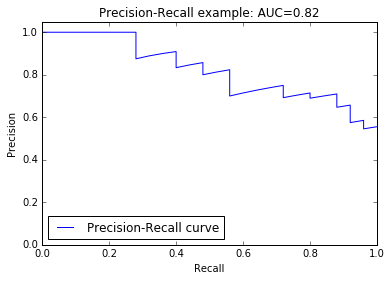

In [1]:
%matplotlib inline

import random
import pylab as pl
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]  # Keep also 2 classes (0 and 1)
n_samples, n_features = X.shape

p = range(n_samples)  # Shuffle samples

random.seed(0)
random.shuffle(p)

X, y = X[p], y[p]
half = int(n_samples / 2)

# Add noisy features
np.random.seed(0)
X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True, random_state=0)
probas_ = classifier.fit(X[:half], y[:half]).predict_proba(X[half:])

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y[half:], probas_[:, 1])
area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [5]:
len(thresholds)

45

In [3]:
X.shape

(100, 804)

In [53]:
print metrics.classification_report(y[half:], classifier.predict(X[half:]))

             precision    recall  f1-score   support

          0       0.73      0.76      0.75        25
          1       0.75      0.72      0.73        25

avg / total       0.74      0.74      0.74        50



### Generalizing our tree

As mentioned before, having a perfect model is more often _scary_. We know this
is overfitting by using a test/train set from iris.

In [25]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(iris.data,
    iris.target, test_size=.3)
clf.fit(x_train, y_train)

print metrics.confusion_matrix(y_train, clf.predict(x_train))
print metrics.classification_report(y_train, clf.predict(x_train))

print metrics.confusion_matrix(y_test, clf.predict(x_test))
print metrics.classification_report(y_test, clf.predict(x_test))

[[36  0  0]
 [ 0 35  0]
 [ 0  0 34]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       1.00      1.00      1.00        35
          2       1.00      1.00      1.00        34

avg / total       1.00      1.00      1.00       105

[[14  0  0]
 [ 0 12  3]
 [ 0  0 16]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.80      0.89        15
          2       0.84      1.00      0.91        16

avg / total       0.94      0.93      0.93        45



Though the concept of "pruning" is not as clear in sklearn (specifically since
decision trees are only included as a "well-known" model), we can generalize the
model by changing the defaults of min_samples_leaf and max_depth.

In [26]:
clf.set_params(min_samples_leaf=4)
clf.set_params(max_depth=3)

clf.fit(x_train, y_train)

print metrics.confusion_matrix(y_train, clf.predict(x_train))
print metrics.confusion_matrix(y_test, clf.predict(x_test))

print metrics.classification_report(y_test, clf.predict(x_test))

[[36  0  0]
 [ 0 34  1]
 [ 0  2 32]]
[[14  0  0]
 [ 0 12  3]
 [ 0  1 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.92      0.80      0.86        15
          2       0.83      0.94      0.88        16

avg / total       0.92      0.91      0.91        45



In [54]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()

clf.set_params(min_samples_leaf=4)
clf.set_params(max_depth=3)

clf = clf.fit(iris.data, iris.target)

If you install pydot with `pip install pydot` you can also plot the decision tree

In [55]:
from sklearn.externals.six import StringIO

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

If you've installed graphviz - log into your virtual machine and run:
```bash
sudo apt-get install graphviz
```
Before running the following to convert the `iris.dot` into an `iris.png` image file

In [29]:
!dot -Tpng iris.dot > iris.png

![Iris Graphviz Plot](iris.png)

## Visualisation with D3

[Original Blog Article](http://planspace.org/20151129-see_sklearn_trees_with_d3/)

In [6]:
from IPython.lib.display import IFrame
IFrame('http://bl.ocks.org/ajschumacher/65eda1df2b0dd2cf616f', 800, 400)

![break](assets/resources.png)

## Resources

### Handbooks

![resource](assets/intro_to_data_mining.png)[Introduction to Data Mining (Ch.4)](http://www-users.cs.umn.edu/~kumar/dmbook/index.php)



### Articles

* [Basic Evaluation Measures for Classifier Performance](http://webdocs.cs.ualberta.ca/~eisner/measures.html)
* [The Relationship Between Precision-Recall and ROC Curves](https://lirias.kuleuven.be/bitstream/123456789/295592/1/d.)
* [Precision recall sensitivity and specificity](http://uberpython.wordpress.com/2012/01/01/precision-recall-sensitivity-and-specificity/)


### Examples

* [Multivariate_Analysis](http://nbviewer.ipython.org/github/piti118/babar_python_tutorial/blob/master/notebooks/03_Multivariate_Analysis.ipynb)


## Colofon

In [2]:
from utils import *
import warnings

warnings.filterwarnings('ignore')
print_versions()

Python    2.7.10
IPython   4.0.0
numpy     1.10.1
pandas    0.17.0
sklearn   0.17
seaborn   0.6.0


In [3]:
%%html

<link rel="stylesheet" href="theme/custom.css">